# Лабораторна робота №4

#### ФБ-34 Кувавіна Софія

# Перший рівень

### Завантаження даних

In [2]:
import os, urllib.request, zipfile

def download_first_part():
    url = 'https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip'
    folder = 'first_part_files'
    file = os.path.join(folder, 'data.zip')

    os.makedirs(folder, exist_ok=True)

    if not os.path.exists(file):
        try:
            urllib.request.urlretrieve(url, file)
            print("Архів завантажено")
        except Exception as e:
            print(f"Помилка: {e}")
            return

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall(folder)
        print("Розархівовано:")
        for name in zip_ref.namelist():
            print(" •", name)

download_first_part()


Розархівовано:
 • household_power_consumption.txt


### Data cleaning (відкидання даних, заміна поточного Nan значення на попереднє)

In [3]:
import pandas as pd

def load_dataframe():
    df = pd.read_csv("first_part_files/household_power_consumption.txt", sep=';', na_values='?', low_memory=False)
    df.dropna(inplace=True)
    return df

def prepare_dataframe(df):
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    return df.drop(columns=['Date', 'Time'])

def to_numpy_array(df):
    cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    df[cols] = df[cols].astype(float)
    return df.to_numpy()


## PANDAS DATAFRAME

In [4]:
raw_df = load_dataframe()
household_power = prepare_dataframe(raw_df)
household_power.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [35]:
from timeit import timeit

def filter_power_gt5(df):
    return df[df['Global_active_power'] > 5]

filtered_5kw = filter_power_gt5(household_power)
time_first_task_df = timeit(lambda: filter_power_gt5(household_power), number=1)

print(f">5кВт: {len(filtered_5kw)} записів")
print(f"Час: {time_first_task_df:.4f} сек")
filtered_5kw.head()


>5кВт: 17547 записів
Час: 0.0040 сек


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
11,5.412,0.470,232.78,23.2,0.0,1.0,17.0,2006-12-16 17:35:00
12,5.224,0.478,232.99,22.4,0.0,1.0,16.0,2006-12-16 17:36:00


2. Обрати всі записи, у яких вольтаж перевищую 235 В.

In [36]:
def filter_voltage_gt235(df):
    return df[df['Voltage'] > 235]

filtered_235v = filter_voltage_gt235(household_power)
time_second_task_df = timeit(lambda: filter_voltage_gt235(household_power), number=1)

print(f">235В: {len(filtered_235v)} записів")
print(f"Час: {time_second_task_df:.4f} сек")
filtered_235v.head()


>235В: 1952491 записів
Час: 0.1362 сек


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
5,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
6,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00
7,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00
14,4.054,0.422,235.24,17.6,0.0,1.0,17.0,2006-12-16 17:38:00


3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [37]:
def filter_current_19_20(df):
    df = df[(df['Global_intensity'].between(19, 20)) & (df['Sub_metering_2'] > df['Sub_metering_3'])]
    return df

filtered_current = filter_current_19_20(household_power)
time_third_task_df = timeit(lambda: filter_current_19_20(household_power), number=1)

print(f"19–20А, група2>3: {len(filtered_current)} записів")
print(f"Час: {time_third_task_df:.4f} сек")
filtered_current.head()


19–20А, група2>3: 2509 записів
Час: 0.0269 сек


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
45,4.464,0.136,234.66,19.0,0.0,37.0,16.0,2006-12-16 18:09:00
460,4.582,0.258,238.08,19.6,0.0,13.0,0.0,2006-12-17 01:04:00
464,4.618,0.104,239.61,19.6,0.0,27.0,0.0,2006-12-17 01:08:00
475,4.636,0.140,237.37,19.4,0.0,36.0,0.0,2006-12-17 01:19:00
476,4.634,0.152,237.17,19.4,0.0,35.0,0.0,2006-12-17 01:20:00


4. Обрати випадковим чином 500000 записів (без повторів елементіввибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [46]:
def fp_fourth_task_df(df):
    sample = df.sample(n=500_000, replace=False)
    times = []
    for i in range(1, 4):
        col = f'Sub_metering_{i}'
        avg = sample[col].mean()
        t = timeit(lambda: sample[col].mean(), number=1)
        times.append(t)
        print(f"Група {i}: {avg:.3f} Вт-год, {t:.4f} сек")
    return tuple(times)
time_mean_sub_metering_1_df, time_mean_sub_metering_2_df, time_mean_sub_metering_3_df = fp_fourth_task_df(household_power)


Група 1: 1.141 Вт-год, 0.0031 сек
Група 2: 1.304 Вт-год, 0.0021 сек
Група 3: 6.464 Вт-год, 0.0012 сек


5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [39]:
def fp_fifth_task_df(df):
    df = df[(df['datetime'].dt.hour >= 18) & (df['Global_active_power'] > 6)]
    df = df[(df['Sub_metering_2'] > df['Sub_metering_1']) & (df['Sub_metering_2'] > df['Sub_metering_3'])]

    half = len(df) // 2
    result = pd.concat([df.iloc[:half:3], df.iloc[half::4]])
    return result

time_five_task_df = timeit(lambda: fp_fifth_task_df(household_power), number=1)
result_task5_df = fp_fifth_task_df(household_power)

print(f"Відібрано: {len(result_task5_df)} записів")
print(f"Час: {time_five_task_df:.4f} сек")


Відібрано: 310 записів
Час: 0.4211 сек


## NUMPY ARRAY

In [ ]:
def print_array_info(arr, columns=None, n=5):
    all_cols = ['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
                'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    
    idx = list(range(arr.shape[1])) if columns is None else [all_cols.index(c) for c in columns]
    headers = ['№'] + [all_cols[i] for i in idx]

    print("{:<5} {}".format(*headers))
    
    for i, row in enumerate(arr[:n]):
        print("{:<5} {}".format(i, [row[j] for j in idx]))

    if arr.shape[0] > 2 * n:
        print("...")

    for i, row in enumerate(arr[-n:], start=arr.shape[0] - n):
        print("{:<5} {}".format(i, [row[j] for j in idx]))

raw_df = load_dataframe()
array = to_numpy_array(raw_df)

print_array_info(array)
print(f" Записів: {array.shape[0]}")


№     Date
0     ['16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0.0, 1.0, 17.0]
1     ['16/12/2006', '17:25:00', 5.36, 0.436, 233.63, 23.0, 0.0, 1.0, 16.0]
2     ['16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23.0, 0.0, 2.0, 17.0]
3     ['16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23.0, 0.0, 1.0, 17.0]
4     ['16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0.0, 1.0, 17.0]
...
2049275 ['26/11/2010', '20:58:00', 0.946, 0.0, 240.43, 4.0, 0.0, 0.0, 0.0]
2049276 ['26/11/2010', '20:59:00', 0.944, 0.0, 240.0, 4.0, 0.0, 0.0, 0.0]
2049277 ['26/11/2010', '21:00:00', 0.938, 0.0, 239.82, 3.8, 0.0, 0.0, 0.0]
2049278 ['26/11/2010', '21:01:00', 0.934, 0.0, 239.7, 3.8, 0.0, 0.0, 0.0]
2049279 ['26/11/2010', '21:02:00', 0.932, 0.0, 239.55, 3.8, 0.0, 0.0, 0.0]
 Записів: 2049280


1. Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [40]:
def fp_first_task_np(arr):
    return arr[arr[:, 2] > 5]

task1_np = fp_first_task_np(array)
time_first_task_np = timeit(lambda: fp_first_task_np(array), number=1)

print(f">5 кВт: {len(task1_np)} записів,  {time_first_task_np:.4f} сек")
print_array_info(task1_np, columns=['Date', 'Time', 'Global_active_power'])


>5 кВт: 17547 записів,  0.0517 сек
№     Date
0     ['16/12/2006', '17:25:00', 5.36]
1     ['16/12/2006', '17:26:00', 5.374]
2     ['16/12/2006', '17:27:00', 5.388]
3     ['16/12/2006', '17:35:00', 5.412]
4     ['16/12/2006', '17:36:00', 5.224]
...
17542 ['22/11/2010', '18:40:00', 5.408]
17543 ['22/11/2010', '18:41:00', 5.528]
17544 ['24/11/2010', '07:50:00', 5.172]
17545 ['24/11/2010', '07:51:00', 5.75]
17546 ['25/11/2010', '07:21:00', 5.074]


2. Обрати всі записи, у яких вольтаж перевищую 235 В.

In [41]:
def fp_second_task_np(arr):
    return arr[arr[:, 4] > 235]

task2_np = fp_second_task_np(array)
time_second_task_np = timeit(lambda: fp_second_task_np(array), number=1)

print(f" >235 В: {len(task2_np)} записів,  {time_second_task_np:.4f} сек")
print_array_info(task2_np, columns=['Date', 'Time', 'Voltage'])


 >235 В: 1952491 записів,  0.4461 сек
№     Date
0     ['16/12/2006', '17:28:00', 235.68]
1     ['16/12/2006', '17:29:00', 235.02]
2     ['16/12/2006', '17:30:00', 235.09]
3     ['16/12/2006', '17:31:00', 235.22]
4     ['16/12/2006', '17:38:00', 235.24]
...
1952486 ['26/11/2010', '20:58:00', 240.43]
1952487 ['26/11/2010', '20:59:00', 240.0]
1952488 ['26/11/2010', '21:00:00', 239.82]
1952489 ['26/11/2010', '21:01:00', 239.7]
1952490 ['26/11/2010', '21:02:00', 239.55]


3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [42]:
def fp_third_task_np(arr):
    part = arr[(arr[:, 5] >= 19) & (arr[:, 5] <= 20)]
    return part[part[:, 7] > part[:, 8]]

task3_np = fp_third_task_np(array)
time_third_task_np = timeit(lambda: fp_third_task_np(array), number=1)

print(f"Струм 19–20А і grp2>grp3: {len(task3_np)} записів, {time_third_task_np:.4f} сек")
print_array_info(task3_np)


Струм 19–20А і grp2>grp3: 2509 записів, 0.0867 сек
№     Date
0     ['16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19.0, 0.0, 37.0, 16.0]
1     ['17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0.0, 13.0, 0.0]
2     ['17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0.0, 27.0, 0.0]
3     ['17/12/2006', '01:19:00', 4.636, 0.14, 237.37, 19.4, 0.0, 36.0, 0.0]
4     ['17/12/2006', '01:20:00', 4.634, 0.152, 237.17, 19.4, 0.0, 35.0, 0.0]
...
2504  ['24/11/2010', '07:53:00', 4.666, 0.0, 235.72, 19.8, 0.0, 39.0, 17.0]
2505  ['24/11/2010', '07:54:00', 4.694, 0.0, 236.78, 19.8, 0.0, 39.0, 18.0]
2506  ['24/11/2010', '07:55:00', 4.602, 0.0, 237.08, 19.4, 0.0, 40.0, 17.0]
2507  ['24/11/2010', '07:56:00', 4.536, 0.0, 237.03, 19.0, 0.0, 39.0, 17.0]
2508  ['24/11/2010', '07:57:00', 4.626, 0.0, 236.78, 19.4, 0.0, 39.0, 17.0]


4. Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [51]:
import numpy as np
from timeit import timeit

def fp_fourth_task_np(arr):
    sample = arr[np.random.choice(len(arr), 500_000, replace=False)]
    for i, col in enumerate([6, 7, 8], start=1):
        mean_val = np.mean(sample[:, col])
        time_four_task_np = timeit(lambda: np.mean(sample[:, col]), number=1)
        print(f"Група {i}: {mean_val:.3f} Вт-год, {time_four_task_np:.4f} сек")
    
    times = [timeit(lambda: np.mean(sample[:, col]), number=1) for col in [6, 7, 8]]
    return tuple(times)
time_mean_sub_metering_1_np, time_mean_sub_metering_2_np, time_mean_sub_metering_3_np = fp_fourth_task_np(array)



Група 1: 1.127 Вт-год, 0.0423 сек
Група 2: 1.306 Вт-год, 0.0424 сек
Група 3: 6.464 Вт-год, 0.0432 сек


5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [53]:
def fp_fifth_task_np(arr):
    filt = arr[(arr[:, 1] >= '18:00:00') & (arr[:, 2] > 6)]
    filt = filt[(filt[:, 7] > filt[:, 6]) & (filt[:, 7] > filt[:, 8])]

    if len(filt) == 0:
        print("Немає відповідних записів")
        return np.empty((0, arr.shape[1]))  

    mid = len(filt) // 2
    selected = np.concatenate((filt[:mid][::3], filt[mid:][::4]))
    return selected

result5_np = fp_fifth_task_np(array)
time_five_task_np = timeit(lambda: fp_fifth_task_np(array), number=1)

print(f"Вибрано: {len(result5_np)} записів, {time_five_task_np:.4f} сек")
print_array_info(result5_np)


Вибрано: 310 записів, 0.1094 сек
№     Date
0     ['16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2, 0.0, 37.0, 17.0]
1     ['16/12/2006', '18:08:00', 6.308, 0.116, 232.25, 27.0, 0.0, 36.0, 17.0]
2     ['28/12/2006', '20:58:00', 6.386, 0.374, 236.63, 27.0, 1.0, 36.0, 17.0]
3     ['28/12/2006', '21:02:00', 8.088, 0.262, 235.5, 34.4, 1.0, 72.0, 17.0]
4     ['28/12/2006', '21:05:00', 7.23, 0.152, 235.22, 30.6, 1.0, 73.0, 17.0]
...
305   ['20/11/2010', '18:30:00', 6.62, 0.314, 229.0, 29.2, 18.0, 34.0, 16.0]
306   ['20/11/2010', '18:34:00', 6.266, 0.36, 229.82, 27.6, 14.0, 35.0, 16.0]
307   ['20/11/2010', '18:38:00', 6.302, 0.376, 229.65, 27.8, 15.0, 34.0, 17.0]
308   ['20/11/2010', '18:42:00', 6.238, 0.344, 229.37, 27.6, 14.0, 35.0, 16.0]
309   ['20/11/2010', '18:46:00', 6.438, 0.308, 229.26, 28.4, 13.0, 39.0, 16.0]


Таблиця часу виконання

In [52]:
time_comparison = pd.DataFrame({
    'Task1': [time_first_task_df, time_first_task_np],
    'Task2': [time_second_task_df, time_second_task_np],
    'Task3': [time_third_task_df, time_third_task_np],
    'Task4.1': [time_mean_sub_metering_1_df, time_mean_sub_metering_1_np],
    'Task4.2': [time_mean_sub_metering_2_df, time_mean_sub_metering_2_np],
    'Task4.3': [time_mean_sub_metering_3_df, time_mean_sub_metering_3_np],
    'Task5': [time_five_task_df, time_five_task_np]
}, index=['Pandas', 'NumPy'])

print("Порівняння часу виконання (сек):")
print(time_comparison.round(6).to_string())


Порівняння часу виконання (сек):
           Task1     Task2     Task3   Task4.1   Task4.2   Task4.3     Task5
Pandas  0.004028  0.136234  0.026911  0.003114  0.002066  0.001168  0.421140
NumPy   0.051666  0.446124  0.086742  0.054625  0.055465  0.052468  0.080461


# Другий рівень

Завантаження

In [18]:
import os, urllib.request, zipfile

def download_cylinder_bands():
    url = 'https://archive.ics.uci.edu/static/public/32/cylinder+bands.zip'
    folder = 'second_part_files'
    file = os.path.join(folder, 'bands.zip')

    os.makedirs(folder, exist_ok=True)

    if not os.path.exists(file):
        try:
            urllib.request.urlretrieve(url, file)
            print("Архів завантажено.")
        except Exception as e:
            print(f"Помилка: {e}")
            return

    try:
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall(folder)
            print("Розпаковано в:", os.path.abspath(folder))
    except Exception as e:
        print(f"Розархівування не вдалося: {e}")

download_cylinder_bands()


Розпаковано в: s:\zpad\second_part_files


Створення датафрейму

In [54]:
import pandas as pd

def load_cylinder_data():
    file = 'second_part_files/bands.data'
    cols=[
        'timestamp', 'cylinder_number', 'customer', 'job_number', 
        'grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg', 
        'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 
        'solvent_type', 'type_on_cylinder', 'press_type', 'press', 
        'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank', 
        'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humidity', 
        'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 
        'ink_pct', 'solvent_pct', 'esa_voltage', 'esa_amperage', 
        'wax', 'hardener', 'roller_durometer', 'current_density', 
        'anode_space_ratio', 'chrome_content', 'band_type'
    ]
    return pd.read_csv(file, header=None, names=cols, na_values='?')

df = load_cylinder_data()
print(f"Завантажено {len(df)} рядків")

Завантажено 541 рядків


Аналіз пропущених значень

paper_mill_location    157
blade_pressure          65
blade_mfg               60
esa_voltage             58
ink_pct                 57
proof_on_ctd_ink        57
solvent_pct             57
varnish_pct             57
roller_durometer        56
solvent_type            56
esa_amperage            56
proof_cut               55
grain_screened          49
roughness               32
caliper                 28
direct_steam            25
type_on_cylinder        19
plating_tank            19
press_speed             12
hardener                 9
current_density          9
anode_space_ratio        9
wax                      8
viscosity                6
chrome_content           5
cylinder_size            4
ink_temperature          4
humidity                 3
band_type                2
cylinder_number          1
press_type               1
job_number               1
press                    1
ink_type                 1
timestamp                0
customer                 0
ink_color                0
u

C:\Users\Sofiya\AppData\Local\Temp\ipykernel_4444\2450013188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="Blues")


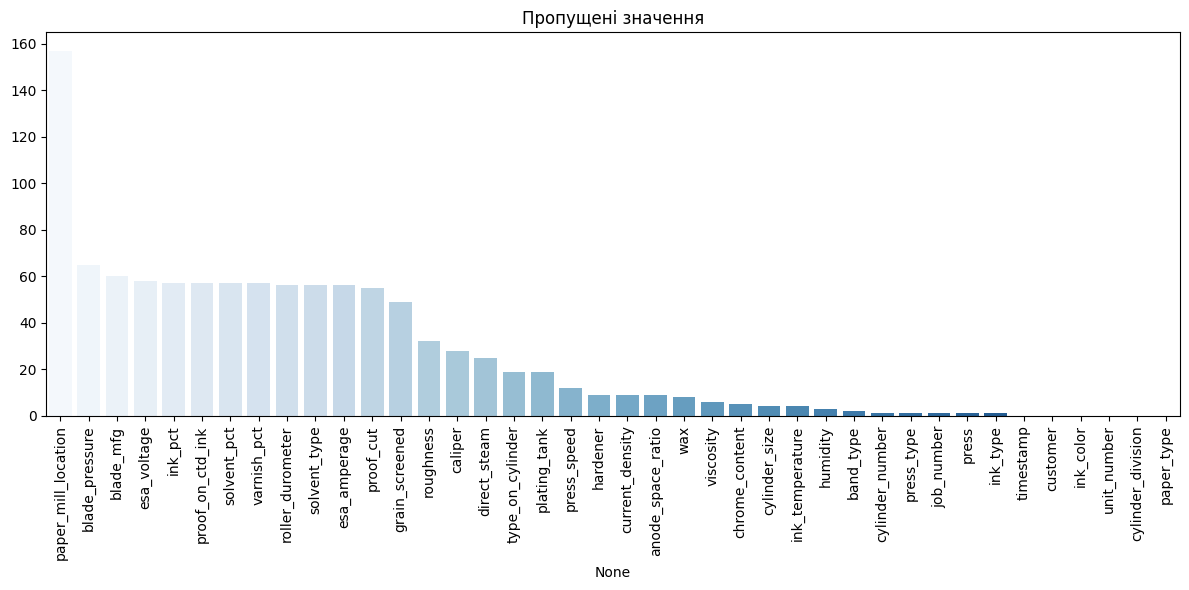

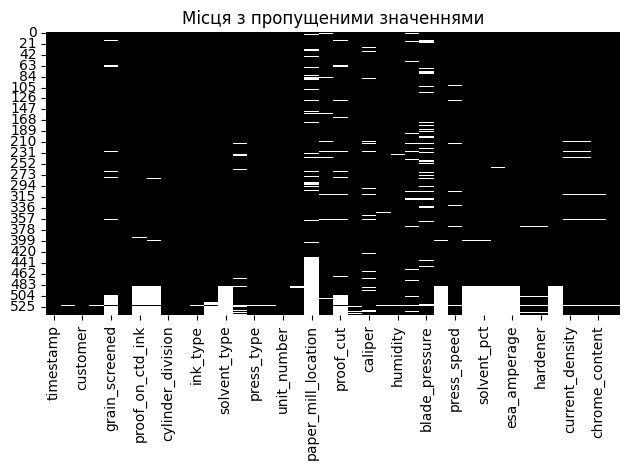

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

missing = df.isna().sum().sort_values(ascending=False)
print(missing)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing.index, y=missing.values, palette="Blues")
plt.xticks(rotation=90)
plt.title("Пропущені значення")
plt.tight_layout()
plt.show()

sns.heatmap(df.isna(), cbar=False, cmap="gray")
plt.title("Місця з пропущеними значеннями")
plt.tight_layout()
plt.show()

1. Поборотися із зниклими даними. Для цього подивитись https://

www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-
python-a-complete-guide/

C:\Users\Sofiya\AppData\Local\Temp\ipykernel_4444\3980864375.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')
C:\Users\Sofiya\AppData\Local\Temp\ipykernel_4444\3980864375.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


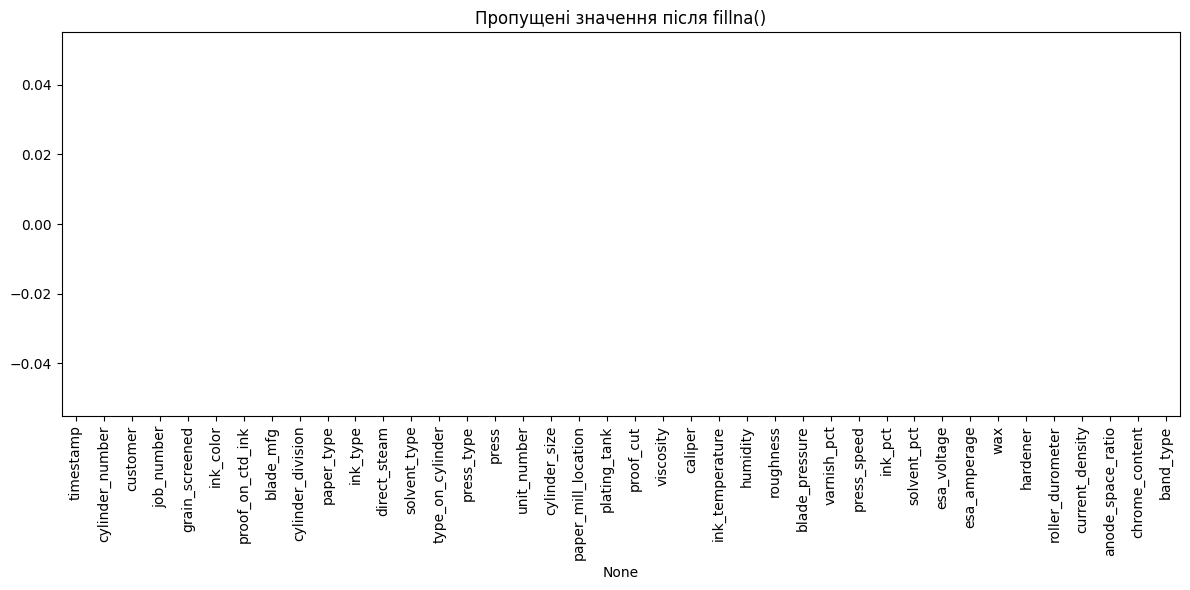

In [22]:
def dropna_clearing(df):
    df_clean = df.dropna()
    print(df_clean.isna().sum().sort_values(ascending=False))

    plt.figure(figsize=(12, 6))
    sns.heatmap(df_clean.isna(), cmap='binary', cbar=False)
    plt.title("Після dropna()")
    plt.tight_layout()
    plt.show()

    return df_clean

def fillna_clearing(df):
    df_filled = df.fillna(method='ffill')
    missing = df_filled.isna().sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing.index, y=missing.values, palette="viridis")
    plt.xticks(rotation=90)
    plt.title("Пропущені значення після fillna()")
    plt.tight_layout()
    plt.show()

    return df_filled

df = fillna_clearing(df) 
#df = dropna_clearing(df)    


In [23]:
df

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,X126,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
3,19910104,T133,MASSEY,39039.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
5,19910104,T218,MASSEY,38039.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5.0,0.0,2.5,0.8,40.0,40.0,103.87,100.0,noband
6,19910111,X249,ROSES,35751.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6.0,0.0,2.5,0.6,30.0,40.0,106.67,100.0,noband
7,19910111,X788,ROSES,35751.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6.0,0.0,2.5,1.1,30.0,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,19901211,X242,AMES,34590.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,41.2,8.0,0.0,3.0,1.0,33.0,40.0,106.45,100.0,noband
426,19901214,X108,ECKERDS,34693.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,1.0,0.0,2.5,1.5,30.0,40.0,106.45,100.0,noband
427,19901218,X80,ECKERDS,34694.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,39.5,4.5,0.0,1.9,1.3,30.0,40.0,114.28,100.0,noband
428,19901218,F482,DOWNS,35525.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.1,4.0,0.0,3.0,1.0,40.0,40.0,117.85,100.0,noband


2. Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [24]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

def standardize(col):
    return (col - col.mean()) / col.std()

numeric = df.select_dtypes(include='number').columns

for col in numeric:
    df[f'norm_{col}'] = normalize(df[col])
    df[f'std_{col}'] = standardize(df[col])

print(f"Нормалізовано: [{df['norm_proof_cut'].min():.2f}, {df['norm_proof_cut'].max():.2f}]")
print(f"Стандартизовано: mean={df['std_proof_cut'].mean():.2f}, std={df['std_proof_cut'].std():.2f}")


Нормалізовано: [0.00, 1.00]
Стандартизовано: mean=-0.00, std=1.00


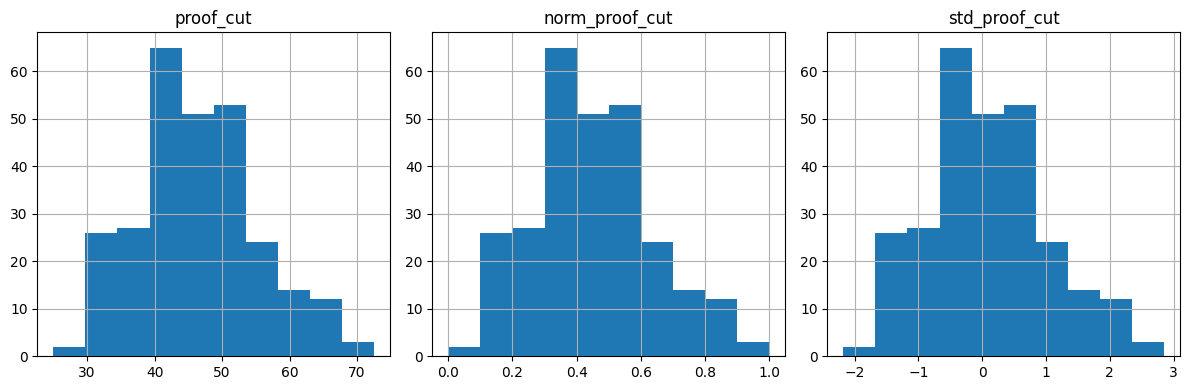

In [25]:
plt.figure(figsize=(12, 4))

for i, version in enumerate(['proof_cut', 'norm_proof_cut', 'std_proof_cut']):
    plt.subplot(1, 3, i+1)
    df[version].hist()
    plt.title(version)

plt.tight_layout()
plt.show()


3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

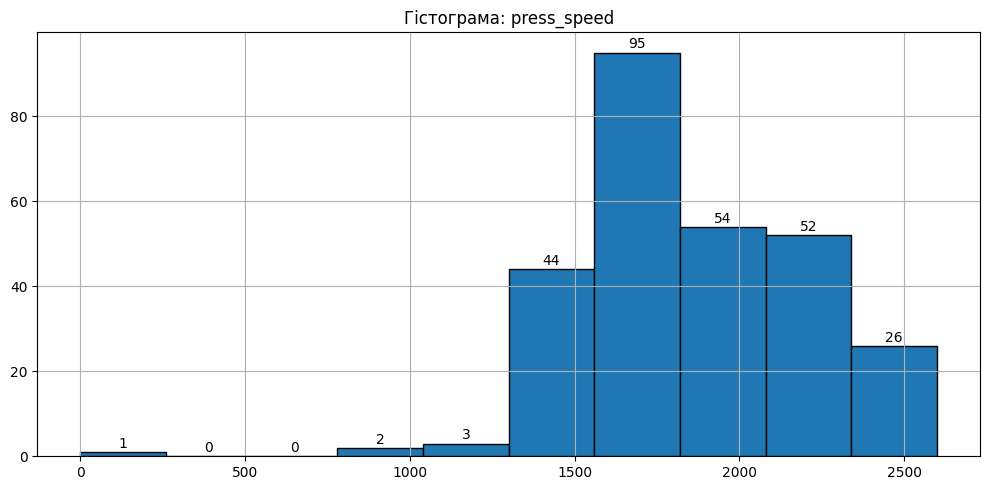

In [26]:
def plot_hist(attr):
    plt.figure(figsize=(10, 5))
    counts, bins, _ = plt.hist(df[attr], bins=10, edgecolor='black')
    for i in range(len(counts)):
        plt.text((bins[i] + bins[i+1])/2, counts[i] + 1, str(int(counts[i])), ha='center')
    plt.title(f'Гістограма: {attr}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_hist('press_speed')


4. Збудувати графік залежності одного integer/real атрибута від іншого.

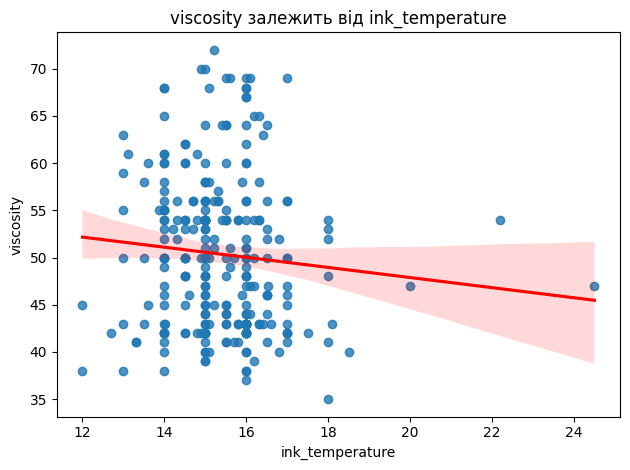

In [27]:
def plot_corr(x, y):
    sns.regplot(data=df, x=x, y=y, line_kws={'color': 'red'})
    plt.title(f'{y} залежить від {x}')
    plt.tight_layout()
    plt.show()

plot_corr('ink_temperature', 'viscosity')


5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [58]:
def calc_corr_clean(x, y):
    clean_data = df[[x, y]].dropna()
    p, _ = pearsonr(clean_data[x], clean_data[y])
    s, _ = spearmanr(clean_data[x], clean_data[y])
    print(f"Пірсон: {p:.3f}, Спірман: {s:.3f}")

calc_corr_clean('viscosity', 'press_speed')


Пірсон: 0.022, Спірман: 0.028


6. Провести One Hot Encoding категоріального string атрибуту.

In [56]:
def one_hot(attr):
    encoded = pd.get_dummies(df[attr], prefix=attr)
    df_out = pd.concat([df, encoded], axis=1)
    print(f"One Hot для {attr}: {encoded.shape[1]} колонок")
    return df_out

df_encoded = one_hot('paper_type')


One Hot для paper_type: 6 колонок


7. Провести візуалізацію багатовимірних даних, використовуючи

приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-
effective-visualization-of-multi-dimensional-data-6c7202990c57.

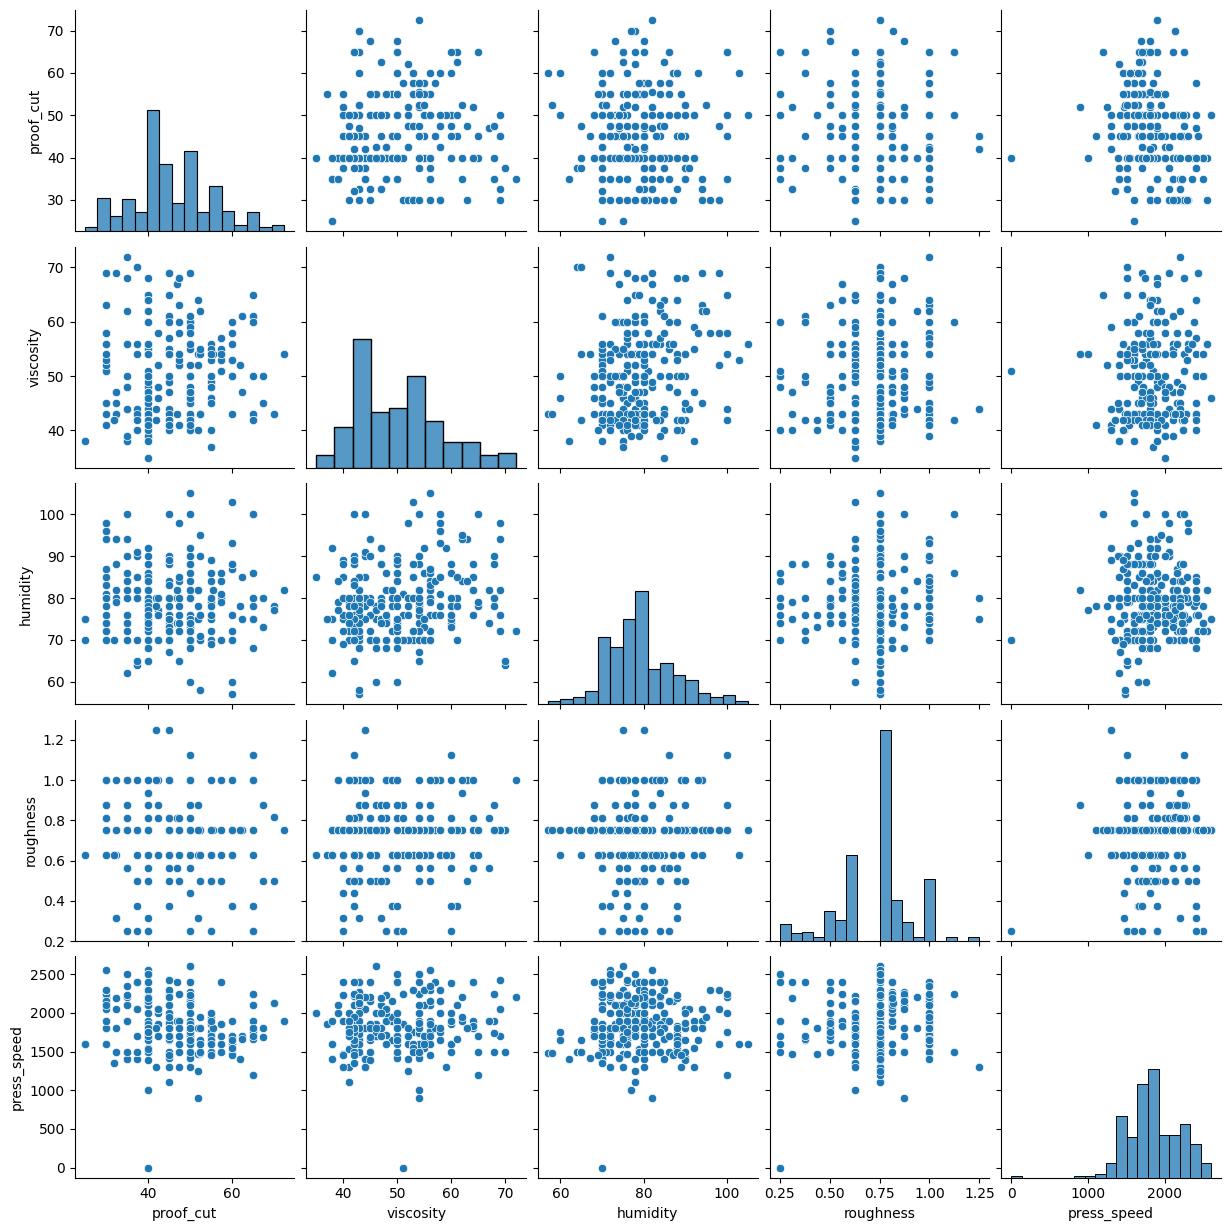

In [30]:
multi_cols = ['proof_cut', 'viscosity', 'humidity', 'roughness', 'press_speed']

sns.pairplot(df[multi_cols].dropna())
plt.show()